In [5]:
from gsw import *

Initializing a with -1s
Initializing b with 1s
Computing the list of elements that are alive with threshold 1e-12
x in basis: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
a: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
b: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.

C:\Users\Ga Bo\Desktop\Master Thesis\GSWalk\gsw.py:325: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  meq = A.shape[0]


ValueError: operands could not be broadcast together with shapes (100,) (100,3) 

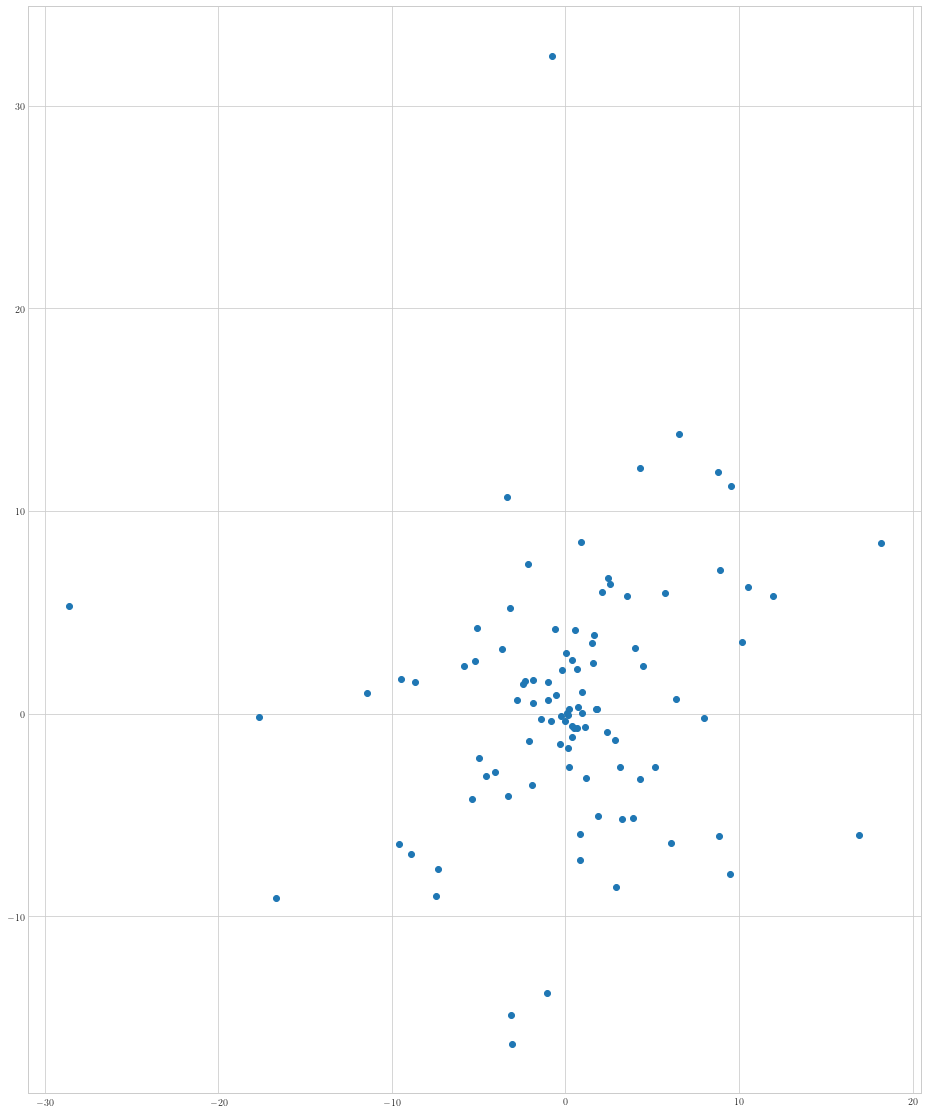

In [6]:
n=100
d=100
v=sample_from_ball(n,d=d)
for j in range(len(v)):
    v[j]=normalize(v[j])*(j+1)
plt.plot([e[0] for e in v],[e[1] for e in v],'o',label='Input vector')
B=np.transpose(np.vstack(tuple([e for e in v])))
gsw_xs=[]
naive_xs=[]
deterministic_gsw_xs=[]
for i in range(n):
    gsw_xs.append(gram_schmidt_walk(v,np.zeros(n),debug=True,mode='min_move_random',no_matrix_mult=True))
    deterministic_gsw_xs.append(gram_schmidt_walk(v,np.zeros(n),debug=False,smallest_delta=True))
    naive_xs.append(naive_walk(v))
plt.plot([np.matmul(B,x)[0] for x in gsw_xs],[np.matmul(B,x)[1] for x in gsw_xs],'o',label='Output sum of groups with GSW with min_random_move mode')
plt.plot([np.matmul(B,x)[0] for x in naive_xs],[np.matmul(B,x)[1] for x in naive_xs],'o',label='Output sum of naive walk groups')
plt.plot([np.matmul(B,x)[0] for x in deterministic_gsw_xs],[np.matmul(B,x)[1] for x in deterministic_gsw_xs],'o',label='Output sum of groups with deterministic GSW')
plt.legend()
plt.legend(bbox_to_anchor=(1.35, 1))
tikzplotlib.save(f"gsw_bad_{n}.tex")